In [2]:
# import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# import necessary packages to evaluate how models perform
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

In [3]:
# load the data
df = pd.read_csv('../input/creditcard-noduplicates/creditcard_noduplicates.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Define the explanatory variables
X = df.drop(['Class'], axis=1)

# Declare target variable
y = df['Class']

# I call StandardScaler to scale all the variables but the variables most important to scale are Time and Amount
# I also fit the scaler to the data and then transform it
X_scaled = StandardScaler().fit_transform(X)

# check to see data has been scaled
X_scaled

array([[-1.99682292, -0.70108232, -0.04168726, ...,  0.33303251,
        -0.06584955,  0.24419951],
       [-1.99682292,  0.60879165,  0.16413764, ..., -0.0271543 ,
         0.0432187 , -0.34258399],
       [-1.99680186, -0.7003364 , -0.81133678, ..., -0.14432548,
        -0.1838243 ,  1.15889967],
       ...,
       [ 1.64227757,  0.98235398, -0.18043304, ...,  0.00680174,
        -0.08264021, -0.0822395 ],
       [ 1.64227757, -0.12646526,  0.32465977, ...,  0.27052318,
         0.31700384, -0.31339058],
       [ 1.64236181, -0.27686005, -0.1127094 , ..., -0.01055821,
         0.03994074,  0.51329005]])

In [5]:
# Perform Random UnderSampling so their will be only 473 non-fraudulent transactions
rus = RandomUnderSampler()

X_rus, y_rus = rus.fit_resample(X_scaled, y)
# Checks to see if we have an equal amount of fraudulent and non-fraudulent transactions
print(Counter(y_rus))
    
# Split original data and random undersampled data into training and test sets
X_rus_train, X_rus_test, y_rus_train, y_rus_test = train_test_split(X_rus, y_rus, test_size=0.20)
    
# Only need to split the original data one time so we do it outside of the loop to help with data leakage
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20)

Counter({0: 473, 1: 473})


In [6]:
# Logistic Regression model (with first 5 different samples)
from sklearn import linear_model
logr = linear_model.LogisticRegression()


model_logr = logr.fit(X_rus_train, y_rus_train)

# Model makes its predictions
y_pred_logr = model_logr.predict(X_rus_test)
    
# print classification report so we can visually view the scores
print(classification_report(y_rus_test, y_pred_logr))    
    

print('The accuracy score is:', round(accuracy_score(y_rus_test, y_pred_logr), 4))
print('The precision score is:', round(precision_score(y_rus_test, y_pred_logr), 4))
print('The recall score is:', round(recall_score(y_rus_test, y_pred_logr), 4))
print('The f1_score over is:', round(f1_score(y_rus_test, y_pred_logr), 4))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        88
           1       0.96      0.90      0.93       102

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190

The accuracy score is: 0.9263
The precision score is: 0.9583
The recall score is: 0.902
The f1_score over is: 0.9293


Below you will see visualizations of the results for the logistic regression model

1. Confusion Matrix
2. Receiver Operating Characteristic Curve
3. Feature Importance (2 parts)

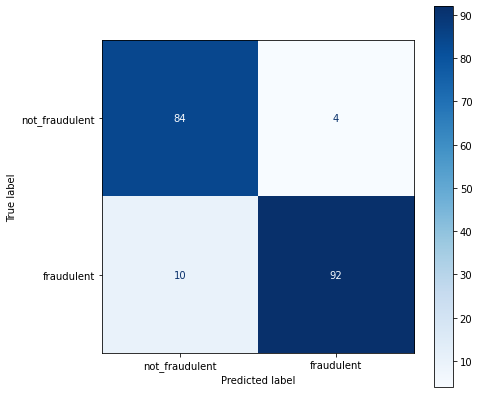

In [14]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 7,7

plot_confusion_matrix(model_logr, X_rus_test, y_rus_test, display_labels=['not_fraudulent', 'fraudulent'], cmap=plt.cm.Blues, normalize=None);

Above is the confusion matrix and this metric visualizes the results for the model and the numbers provided can be used to calculate the precision, recall, accuracy, f1-score identified above. Overall it can be seen that the model performs well. I want the model to predict fraudulent transactions correctly and it misclassified 9 out of 102 fraudulent transactions. This is something that I would want to continue to improve given more data.

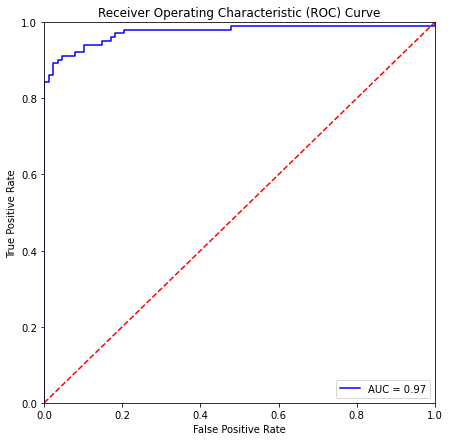

In [16]:
# Plot ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

probs = logr.predict_proba(X_rus_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_rus_test, preds)
roc_auc = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Above is the ROC curve. The curve is close to the top left hand corner so this tells us the model has great predictive power. The red dashed line represents a model that has no predicitve power. The AUC score in the bottom right corner tells us the area under the curve represented as a percentage. The higher the score the better the model.

Feature: 0, Score: -0.38789
Feature: 1, Score: 0.43898
Feature: 2, Score: 0.06153
Feature: 3, Score: -0.11872
Feature: 4, Score: 1.23080
Feature: 5, Score: 0.25027
Feature: 6, Score: -0.37140
Feature: 7, Score: 0.04413
Feature: 8, Score: -0.73785
Feature: 9, Score: -0.41693
Feature: 10, Score: -0.66294
Feature: 11, Score: 0.34187
Feature: 12, Score: -0.85705
Feature: 13, Score: -0.43880
Feature: 14, Score: -1.37205
Feature: 15, Score: -0.06706
Feature: 16, Score: -0.36031
Feature: 17, Score: -0.36085
Feature: 18, Score: 0.09235
Feature: 19, Score: -0.02690
Feature: 20, Score: -0.34108
Feature: 21, Score: 0.06622
Feature: 22, Score: 0.64799
Feature: 23, Score: 0.51911
Feature: 24, Score: 0.03931
Feature: 25, Score: 0.05181
Feature: 26, Score: -0.28169
Feature: 27, Score: 0.01773
Feature: 28, Score: -0.11237
Feature: 29, Score: 0.94711


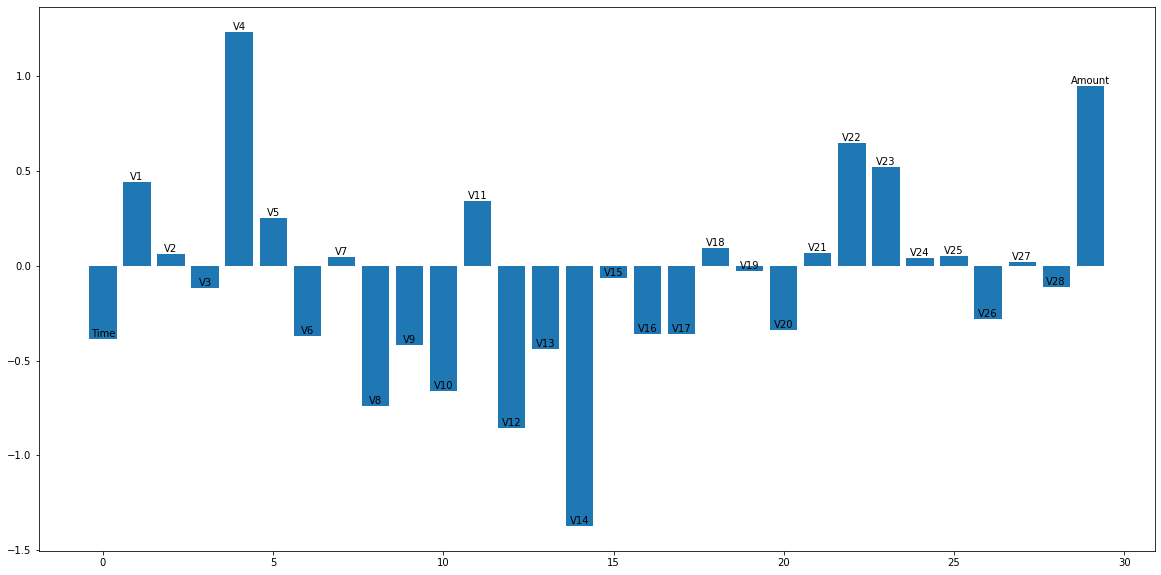

In [24]:
# summarize feature importance
importance = model_logr.coef_[0]

total = 0
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    # use total in next cell
    total = total + abs(v)
# plot feature importance
plt.figure(figsize=(20,10))
plt.bar([x for x in range(len(importance))], importance)

y = 0
col_names = df.columns

for i, v in enumerate(importance):
    plt.annotate(str(col_names[y]), xy=(i, v), ha='center', va='bottom')
    y = y + 1
plt.show()



Above is a plot of the coefficients for each feature. The coefficient shows the effect of a one unit change in the associated feature. For example V1 has a coefficient of 0.43898 and if the value of V1 were 0.5 then then effect for V1 would be 0.21949 (=0.43898 * 0.5).
<br><br>
If I wanted to try to improve my model I could calculate the average magnitude of the coefficients and keep the features with a coefficient that are greater than the average.
I could also only keep the 2 features that have the highest coefficients and see how my model performs.
<br><br>
#### **Below I have noted the average magnitude of the coefficients and the features I would keep and re-run the model with.

In [25]:
print('The average magnitude of the coefficients for the features is:', round(total/len(importance), 4))
# Improve model by keeping only the features with a coefficient greater than the average magnitude of all the coefficients
for i,v in enumerate(importance):
    if abs(v) > (total/len(importance)):
        print('Feature: %0d, Score: %.5f' % (i,v))

The average magnitude of the coefficients for the features is: 0.3888
Feature: 1, Score: 0.43898
Feature: 4, Score: 1.23080
Feature: 8, Score: -0.73785
Feature: 9, Score: -0.41693
Feature: 10, Score: -0.66294
Feature: 12, Score: -0.85705
Feature: 13, Score: -0.43880
Feature: 14, Score: -1.37205
Feature: 22, Score: 0.64799
Feature: 23, Score: 0.51911
Feature: 29, Score: 0.94711


Below is the 2nd part to the feature importance. I plotted the probabilities that the model predicted a transaction as fraudulent against the two features with the highest model coefficients (V4 and V14) and the feature with the lowest model coefficient (V27). In all of the plots you will also see a curve drawn, which is called the sigmoid function, also know as the activation function for logistic regression.

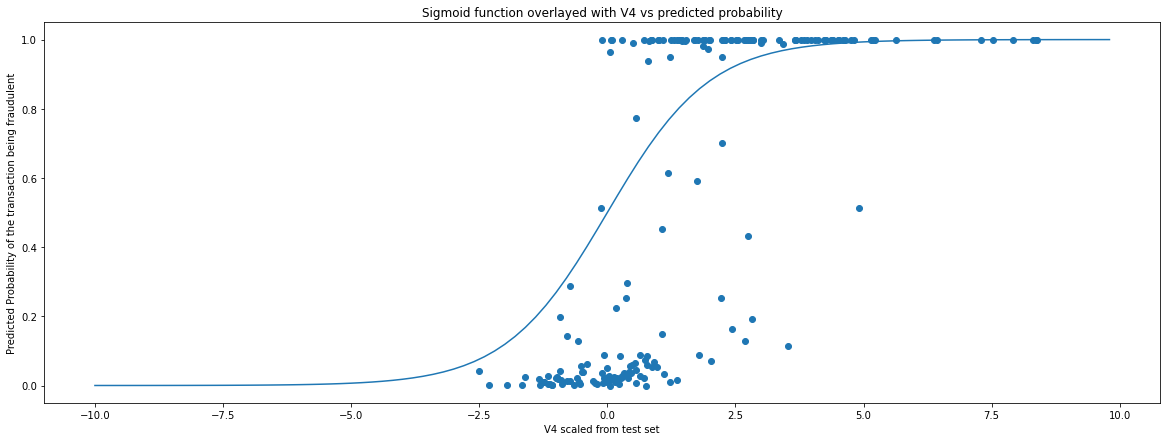

In [26]:
rcParams['figure.figsize'] = 20,7
import math

# Retrieve the predicted probability of the transaction being fraudulent
y_predproba_logr = model_logr.predict_proba(X_rus_test)[:,1]

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

x = np.arange(-10, 10, 0.2)
sig = sigmoid(x)
plt.plot(x,sig)
# X_rus_test[:,4] is the V4 column scaled
plt.scatter(x=X_rus_test[:,4], y=y_predproba_logr)
plt.title('Sigmoid function overlayed with V4 vs predicted probability')
plt.ylabel('Predicted Probability of the transaction being fraudulent')
plt.xlabel('V4 scaled from test set')
plt.show()

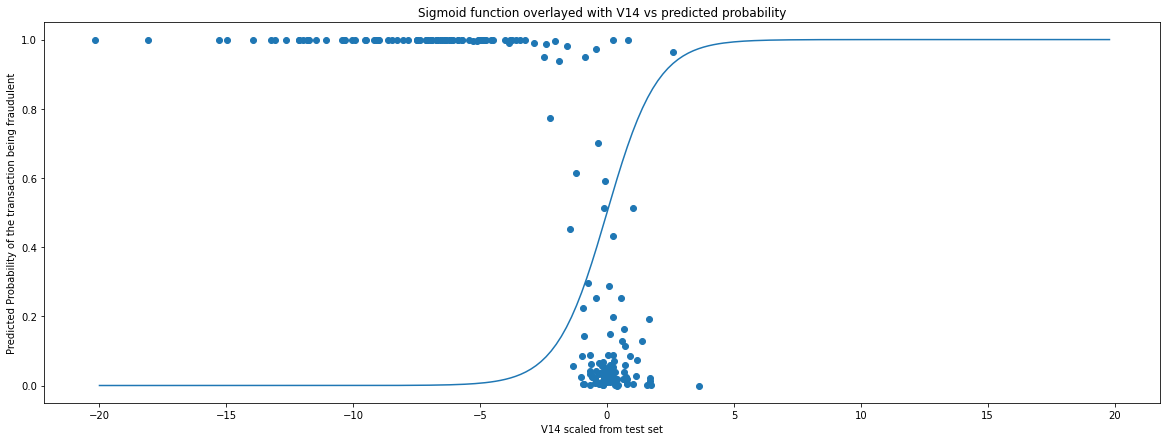

In [27]:
x = np.arange(-20, 20, 0.2)
sig = sigmoid(x)
plt.plot(x,sig)
# X_rus_test[:,14] is the V14 column scaled
plt.scatter(x=X_rus_test[:,14], y=y_predproba_logr)
plt.title('Sigmoid function overlayed with V14 vs predicted probability')
plt.ylabel('Predicted Probability of the transaction being fraudulent')
plt.xlabel('V14 scaled from test set')
plt.show()

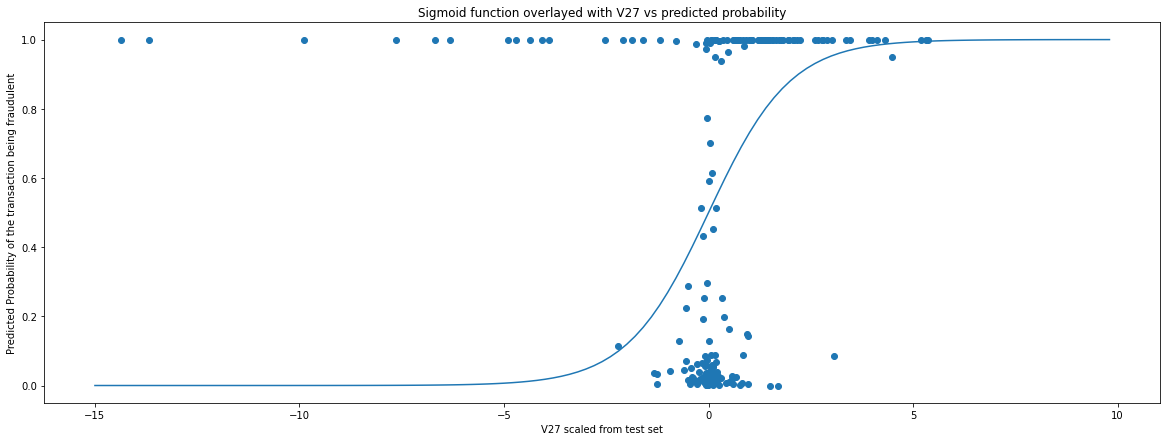

In [28]:
x = np.arange(-15, 10, 0.2)
sig = sigmoid(x)
plt.plot(x,sig)
# X_rus_test[:,27] is the V27 column scaled
plt.scatter(x=X_rus_test[:,27], y=y_predproba_logr)
plt.title('Sigmoid function overlayed with V27 vs predicted probability')
plt.ylabel('Predicted Probability of the transaction being fraudulent')
plt.xlabel('V27 scaled from test set')
plt.show()